<a href="https://colab.research.google.com/github/owgee/general-ml/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $k$-nearest neighbors for Classification

$k$-nearest neighbor classifier ($k$NN) is a particularly interesting algorithm because it is fundamentally different from the learning algorithms we have discussed so far.

$k$NN is a typical example of a $\textbf{lazy learner}$. It is called lazy not because of its apparent simplicity, but because it doesn't learn a discriminative function from the traning data but memorizes the training dataset instead.

The kNN algorithm itself is fairly straightforward and can be summarized by the following steps:
- Step 1: Chose the number of k and a distance metric. The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice.
- Step 2: Find the k nearest neighbors of the sample/instance/entity that we want to classify (k typically an odd number)
- Step 3: Assign the class label by majority vote

Hence, based on the chosen distance metric, the $k$NN alforithm finds the $k$ samples in the training dataset that are closest (most similar) to the point that we want to classify. The class label of the new data point is then determined by a majority vote among its $k$ nearest neighbors. That is, the new data point we would like to classify is assigned the data class which has the most representatives within the nearest neighbors of that point.

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits or satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

The classes in sklearn.neighbors can handle either Numpy arrays or scipy.sparse matrices as input.


$\textit{scikit-learn}$ implements two different nearest neighbors classifiers: $\textit{KNeighborsClassifier}$ implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user. $\textit{RadiusNeighborsClassifier}$ implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.
The k-neighbors classification in $\textit{KNeighborsClassifier}$ is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger $k$ suppresses the effects of noise (i.e., it is less prone to overfitting), but makes the classification boundaries less distinct.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, $\textit{weights = 'uniform'}$, assigns uniform weights to each neighbor. $\textit{weights = 'distance'}$ assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied which is used to compute the weights.

The following block of code is setting up and importing the Iris dataset for k-Nearest Neighbors (kNN) classification using Python's scikit-learn library. Specifically, this code sets up the required libraries, loads the Iris dataset, and prepares the data for a kNN classification by extracting the first two features and the target variable.

In [ ]:
################################################## Imports ##################################################
# To write a Python 2/3 compatible codebase, the first step is to add this line to the top of each module
# This line ensures compatibility between Python 2 and Python 3. It enables the newer Python 3 behaviors for division, print, and Unicode handling in Python 2.
from __future__ import division, print_function, unicode_literals

# The simplest possible classifier is the nearest neighbor: given a new observation X_test, find in the training set
#(i.e. the data used to train the estimator) the k observation(s) with the closest feature vector.
# This script illustrates the usage of kNN.

# Import necessary plotting libraries and specify that graphs should be plotted inline.
%matplotlib inline                           # This is an IPython magic command that ensures plots generated by matplotlib will be displayed directly in the Jupyter notebook.
import matplotlib.pyplot as plt              # Imports the matplotlib plotting library, commonly used for visualizing data.
from matplotlib.colors import ListedColormap # Learn more about matplotlib.colors here
                                             # https://matplotlib.org/3.1.1/api/colors_api.html
                                             # Imports a specific function that allows custom color maps to be created for plots.

# Imports the numpy library, which is a core library for numerical and matrix operations in Python.
import numpy as np                          # np is an alias pointing to numpy

################################################## Load Data ##################################################

# sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods
# Documentation available at https://scikit-learn.org/stable/modules/neighbors.html
from sklearn import neighbors, datasets     # Imports the neighbors and datasets modules from the scikit-learn library.
                                            # The neighbors module contains the kNN implementation
                                            # The datasets module contains a collection of datasets, including the Iris dataset.

# Import iris data set
# See the decision tree notebook for a description of this data set
# Iris dataset details here https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
# and here https://en.wikipedia.org/wiki/Iris_flower_data_set

# The Iris dataset is a classic dataset consists of measurements taken from three types of iris flowers (Setosa, Versicolour, and Virginica)
# for four features (sepal length, sepal width, petal length, and petal width).

# Load the sample dataset and store it under the name iris
iris = datasets.load_iris()

# Retrieve features/attributes of dataset iris
X = iris.data[:, :2]  # we only take the first two features in order to easily visualize the results.
                      # This creates an array of shape (150, 2), with 150 samples and 2 feature (ndarray of shape (150, 2))

# Retrieve target variable of dataset iris
y = iris.target # ndarray of shape (150,)

# NOTE: At this stage, we would normally explore the data before we build a model. Please see the
# notebook 'BusinessAnalytics_DecisionTrees' for the exploration of this dataset.

We need a validation technique to estimate the generalization performance of the model. Hence, we are splitting the data into 70% training and 30% test data. The argument *stratify=y* ensures that the data is split in a stratified manner.Stratification means that the train and test sets have roughly the same proportion of samples from each class as in the original dataset. In the context of the Iris dataset, it ensures that the train and test sets have
similar proportions of each of the three species of iris flowers.

In summary, the following code snippet imports a necessary function from scikit-learn and splits the original dataset (both features and target variable) into training and testing sets. The split is done in a way that 30% of the data is used for testing, and the distribution of classes is consistent between the original dataset and the split datasets.

The output of the train_test_split function is four datasets:

* X_train: The attributes for the training set.
* X_test: The attributes for the test set.
* y_train: The target variable for the training set.
* y_test: The target variable for the test set.


In [ ]:
############################################## Split the Data ##############################################

# This imports the train_test_split function from the scikit-learn library.
# This function is used to randomly split datasets into training and test subsets.
from sklearn.model_selection import train_test_split #splits arrays or matrices into random train and test subsets.

#Simple Split Validation
X_train, X_test, y_train, y_test = train_test_split(X, # This is the dataset containing the attributes/features (in this context, the first two features of the Iris dataset).
                                                    y, # This is the target variable of the dataset (the species of iris flowers in this context).
                                                    test_size=0.3,  # a float number between 0.0 and 1.0 representing the proportion of the dataset to include in the test split
                                                                    # this argument specifies that 30% of the data should be reserved for the test set, while the remaining 70% will be used for training.
                                                    random_state=1, # controls the shuffling for reproducible output
                                                                    # The splitting process involves a random shuffling of data before the split. The random_state ensures that this shuffling
                                                                    # is reproducible. By setting it to a specific number (in this case, 1), you guarantee that the split will be the same every
                                                                    # time the code is run, ensuring consistency and reproducibility.
                                                    stratify=y)     # data is split in a stratified fashion  i.e., creates splits by preserving the same percentage
                                                                    # for each target class as in the complete set.

We next examine the distribution of the target variable in the initial dataset and in the train and test sets to ensure it was split in a stratified fashion. In general, understanding the distribution of the target variable is essential in machine learning contexts. For instance, knowing how many samples belong to each class helps in understanding whether the dataset is balanced or imbalanced.

The following code gives you a summary of how many samples of each class are present in the original, training, and testing datasets. It provides insight into whether the splitting process managed to retain a similar distribution of classes in both training and testing sets, which is often a desirable property, especially when using stratified splits.

---



In [ ]:
########################################## Distribution Target Variable ##########################################

# Count how many data points we have for each label of the target variable
# bincount counts number of occurrences of each value in an array.

print('Labels counts in y:', np.bincount(y))             # The bincount function from the numpy library counts the number of occurrences of each value in the input array.
                                                         # Counts how many samples belong to each class in the target variable y (the original dataset before splitting).
print('Labels counts in y_train:', np.bincount(y_train)) # Counts the occurrences of each class in the training subset (y_train) of the target variable.
print('Labels counts in y_test:', np.bincount(y_test))   # Counts the occurrences of each class in the testing subset (y_test) of the target variable.

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Then, we standardize the features to ensure they have they same scale. The following code is focused on the normalization (specifically, standardization) of the dataset's features. Standardization is a common preprocessing step in machine learning and data analysis which transforms features to have a mean of 0 and a standard deviation of 1. This makes algorithms that rely on the magnitude or scale of features, such as k-NN, work more effectively. Essentially, this pre-processing step will avoid introducing noise in the process as the different scales of the features will not have a disproportionate impact on the distances and predictions.

Thus, the code is preparing the data for machine learning algorithms that are sensitive to the scale of features, such as k-NN.

In [ ]:
############################################# Normalization/Standardization ###################################

# Importing the StandardScaler class
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance
                                                 # The standard score of a sample x is calculated as: z = (x - u) / s
                                                 # where u is the mean of the training sample , and s is the standard deviation of the training sample.
                                                 # Centering and scaling happens independently on each feature.
# Instantiate StandardScaler
sc = StandardScaler()                            # This line creates an instance of the StandardScaler and assigns it to the variable sc.
# Fitting the StandardScaler
sc.fit(X_train)                                  # Compute the mean and std to be used for later scaling
                                                 # The fit method computes the mean (u) and standard deviation (s) of each feature in the training set (X_train).
                                                 # These statistics are then stored in the sc object and are used later for scaling other datasets.
# Transforming the datasets
X_train_std = sc.transform(X_train) # Perform standardization of train set X attributes by centering and scaling
                                    # This line uses the transform method of the sc object to standardize the features in the training set.
X_test_std = sc.transform(X_test)   # Perform standardization of test set X attributes by centering and scaling
                                    # Similarly, this line standardizes the features in the testing set.
                                    # Importantly, it uses the same mean and standard deviation values that were computed from the training set.

Next, we train a k-nearest neighbors (kNN) classifier using the scikit-learn library in Python.

In [ ]:
############################################# Train the Model #############################################

# Import the Necessary Library
from sklearn import neighbors   # imports the neighbors module from the sklearn library.
                                # This module contains the KNeighborsClassifier, which is a machine learning classifier
                                # that uses the k-nearest neighbors algorithm.

# KNeighborsClassifier is a classifier implementing the k-nearest neighbors vote.
# Learn more about it here https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# Setting up the kNN Classifier
# Code initializes a kNN classifier with specific parameters
knn = neighbors.KNeighborsClassifier(n_neighbors=5, # n_neighbors is the k in the kNN
                                                    # It will consider the 5 nearest points to determine the classification of a new data point

                                                    # These parameters together (p and metric) specify the distance metric used by the kNN algorithm.
                           p=2,                     # power parameter for the Minkowski metric.
                           metric='minkowski',      # the default metric is minkowski, which is a generalization of the Euclidean distance
                                                    # with p=2 is equivalent to the standard Euclidean distance.
                                                    # with p=1 is equivalent to the Mahattan distance.

                           n_jobs=-1,               # the number of parallel jobs to run for neighbors search; -1 means using all processors
                                                    # this tells the algorithm to use all available processors on the computer for parallel computation

                           weights='uniform')       # all points in each neighborhood are weighted equally (default). We would choose 'distance' if
                                                    # we wanted to apply a similarity-moderated kNN
# Train the model
knn = knn.fit(X_train_std, y_train)                 # trains the kNN classifier on the standardized training data (X_train_std)

In [ ]:
############################################# Evaluate the Model #############################################

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics
# and distance computations.
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report #The required functions for evaluation metrics are imported

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)            # make predictions for test set
                                            # The classifier (knn) makes predictions on the standardized test data
y_pred_insample = knn.predict(X_train_std)  # make predictions for train set (for educational purposes, to demonstrate the difference)
                                            # The classifier (knn) makes predictions on the standardized train data

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))        # Accuracy is calculated and printed for both the test (out-of-sample) dataset.
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))  # Accuracy is calculated and printed for both the training (in-sample) dataset.

# F1 score
# The F1 score is a harmonic mean of precision and recall, providing a balance between the two metrics
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))           # average='macro' calculate metrics for each label, and find their unweighted mean
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro')) # The average='macro' argument calculates the metric independently for each class and then takes the average, not considering label imbalance.

# Kappa score
# Cohen's Kappa score measures the agreement between the predictions and the actual values, accounting for the possibility of agreement occurring by chance
# It's especially useful when the classes are imbalanced
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))                # computes Cohen’s kappa: a statistic that measures inter-annotator agreement
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))      # (i.e., agreement between predictions and actual values of target variables)

# Build a text report showing the main classification metrics (out-of-sample performance)
# classification_report function provides a comprehensive report displaying key metrics
print(classification_report(y_test, y_pred, target_names=iris.target_names))             # builds a text report showing the main classification metrics (precision, recall, f1-score)
                                                                                         # The target_names argument provides names for each of the classes

Accuracy (out-of-sample): 0.71
Accuracy (in-sample): 0.88
F1 score (out-of-sample):  0.7107897664071189
F1 score (in-sample)    :  0.8764384111561269
Kappa score (out-of-sample):  0.5666666666666667
Kappa score (in-sample)    :  0.8142857142857143
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.57      0.53      0.55        15
   virginica       0.56      0.60      0.58        15

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45



The following code section is focused on identifying the k-nearest neighbors of a given point or set of points using the trained kNN classifier (knn).

The kneighbors_graph function computes the (weighted) graph of k-neighbors for all the points in X. This results in a sparse matrix (to save memory), where each row corresponds to a point in X and contains non-zero entries at the positions corresponding to its k-nearest neighbors. The actual non-zero values represent the weights (in this case, they'll be all 1s, since the default weighting is 'uniform'). The A.toarray() conversion is used to transform this sparse matrix into a regular (dense) NumPy array for easier visualization or further processing.



In [ ]:
############################################# Find Nearest Neighbors #############################################

# Finds the K-neighbors (and the corresponding distances) of a specific point
# "Who are the nearest neighbors in our data to a point where the sepal length is 1 and the sepal width is 1?"
print('The k nearest neighbors (and the corresponding distances) to user [1, 1] are:', knn.kneighbors([[1., 1.]])) # we ask who are the nearest neigbors to a data with
                                                                                                                   # feature values [sepal length = 1, sepal width = 1]
# Finds the K-neighbors of all points in the training set
print('The k nearest neighbors to each user are:', knn.kneighbors(X, return_distance=False))                       # The return_distance=False argument ensures that only the indices
                                                                                                                   # of the neighbors are returned, without the actual distances to them

# Computes the (weighted) graph of k-Neighbors for points in X (complete training set)
A = knn.kneighbors_graph(X) # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html
A.toarray()

The k nearest neighbors (and the corresponding distances) to user [1, 1] are: (array([[0.46381053, 0.52062957, 0.65777865, 0.66031252, 0.70937413]]), array([[ 3, 25, 85, 57, 90]]))
The k nearest neighbors to each user are: [[80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 62 70]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [80 32 57 70  6]
 [80 32 57 70 62]
 [8

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

For educational purposes, we build a function that allows us to visualize the "decision surfaces" of the kNN algorithm and use it below to visualize the "decision surfaces" of the kNN algorithm.


In [ ]:
################################# Function to Visualize Decision Regions of kNN #################################

# This function visualizes the "decision surfaces" of the kNN algorithm
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02): # default values specified for parameters test_idx and resolution

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),           # we use the np.arrange function to create the grid of our plot
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)          # for each point on our grid, we first use the classifier to predict
    Z = Z.reshape(xx1.shape)                                                # which class it belongs to based on the classifier
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):                                 # a loop for plotting the points in our dataset
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=[colors[idx]],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors = 'none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

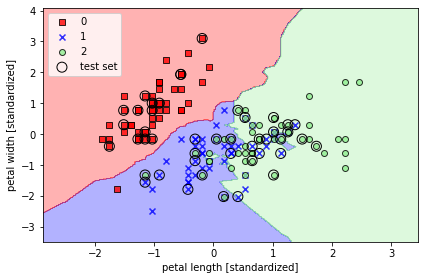

In [ ]:
####################################### Visualize decision regions #######################################

# Stacks needed for visualization of decision regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Visualization of decision regions
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=knn,
                      test_idx=range(105, 150))

# Set parameters for visualization
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

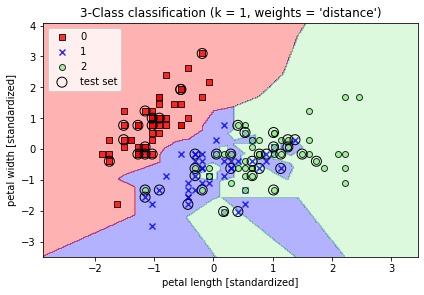

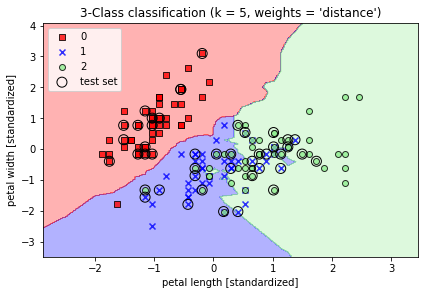

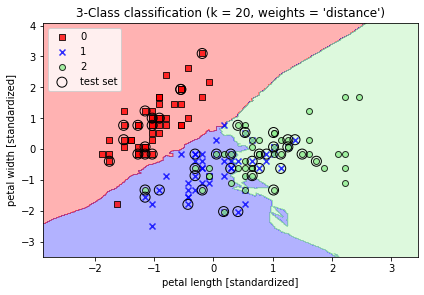

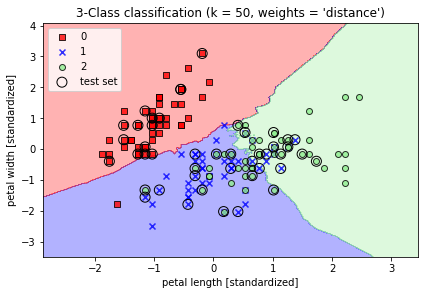

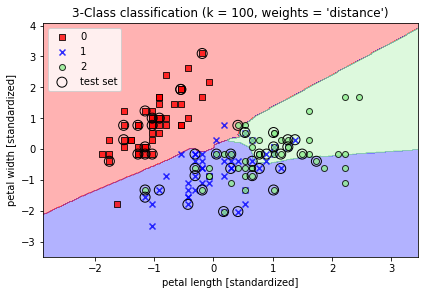

In [ ]:
########################### Visualize decision regions for different k of kNN ###########################

for n_neighbors in [1,5,20,50,100]: # Different k values
    knn = neighbors.KNeighborsClassifier(n_neighbors,
                               p=2,
                               metric='minkowski') #The default metric is minkowski, which is a generalization of the Euclidean distance
                                                   # with p=2 is equivalent to the standard Euclidean distance.
    knn = knn.fit(X_train_std, y_train)            # with p=1 is equivalent to the Mahattan distance.

    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))

    plot_decision_regions(X_combined_std, y_combined,
                          classifier=knn, test_idx=range(105, 150))

    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))
    plt.show()

**The curse of dimansionality**

It is important to mention that $k$NN is very susceptible to overfitting due to the **curse of dimensionality**. The curse of dimensionality describes the phenomenon where the feature space becomes increasingly sparse for an increasing number of dimensions of a fixed-size training dataset. Intuitively, we can think of even the closest neighbors being too far away in a high-dimension space to give a good estimate.

We have discussed the concept of regularization in the context of logistic regression as one way to avoid overfitting. However, in models where regularization is not applicable such as decision trees and $k$NN, we can use feature selection and dimensionality reduction to help us avoid the curse of dimensionality.

# $k$NN for Numeric Prediction [To be continued...]

In [ ]:
# For kNN, as the number of features becomes large, the number of training points
# required for a good estimator grows exponentially!
# Hence, really big (long) data set might be needed when you have many features (i.e., wide data set).

In [ ]:
## Nearest Neighbors regression

# This following example demonstrates the resolution of a regression problem using a k-Nearest Neighbor
# and the interpolation of the target using both barycenter and constant weights.

# Generate sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

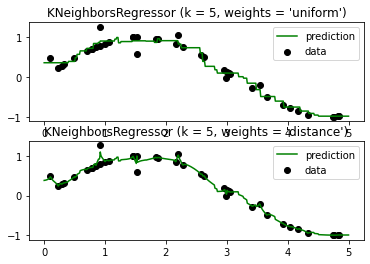

In [ ]:
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()